<a href="https://colab.research.google.com/github/Eduardo-Rivera98/Final-Project-Fundus-Analysis/blob/main/Model_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import load
import h5py
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x=load('drive/MyDrive/x.npy')

In [ ]:
y=load('y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

In [ ]:
from keras import models
from keras import layers
import tensorflow as tf
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 1))),
model.add(layers.MaxPooling2D(2, 2)),
model.add(layers.Conv2D(32, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Flatten()),
model.add(layers.Dense(512, activation='relu')),
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 248, 248, 16)      160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 124, 124, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 29, 29, 64)      

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=50,verbose=1, shuffle=True, validation_data=(x_test,y_test),callbacks=[es_callback])

Epoch 1/50
185/185 [==============================] - 181s 976ms/step - loss: 0.6836 - accuracy: 0.5678 - val_loss: 0.6768 - val_accuracy: 0.5828
Epoch 2/50
185/185 [==============================] - 180s 971ms/step - loss: 0.6699 - accuracy: 0.5820 - val_loss: 0.6625 - val_accuracy: 0.5835
Epoch 3/50
185/185 [==============================] - 178s 964ms/step - loss: 0.6603 - accuracy: 0.5928 - val_loss: 0.6644 - val_accuracy: 0.5970
Epoch 4/50
185/185 [==============================] - 178s 964ms/step - loss: 0.6514 - accuracy: 0.6117 - val_loss: 0.6527 - val_accuracy: 0.6234
Epoch 5/50
185/185 [==============================] - 179s 966ms/step - loss: 0.6507 - accuracy: 0.6114 - val_loss: 0.6497 - val_accuracy: 0.6234
Epoch 6/50
185/185 [==============================] - 178s 964ms/step - loss: 0.6435 - accuracy: 0.6236 - val_loss: 0.6463 - val_accuracy: 0.6126
Epoch 7/50
185/185 [==============================] - 178s 964ms/step - loss: 0.6386 - accuracy: 0.6283 - val_loss: 0.6493 -

In [ ]:
y_pred=(model.predict(x_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       858
           1       0.73      0.81      0.77       621

    accuracy                           0.79      1479
   macro avg       0.79      0.80      0.79      1479
weighted avg       0.80      0.79      0.79      1479



In [ ]:
precision_score(
y_test,
y_pred)

0.7279305354558611

(<Figure size 576x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2f031dffd0>)

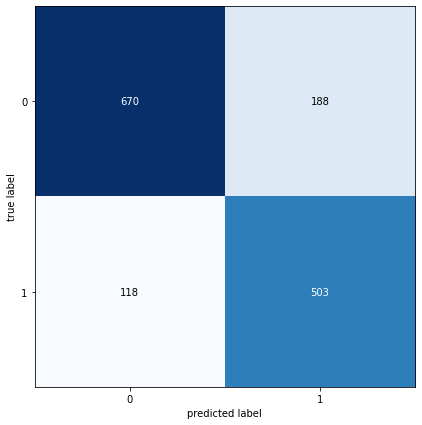

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7))

In [ ]:
model.save('drive/MyDrive/my_model_diabetes7.h5')

In [ ]:
drive.flush_and_unmount()